<a href="https://colab.research.google.com/github/saadmarwan16/tensorflow_exercise/blob/main/car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from pandas import read_csv
import matplotlib.pyplot as plt

In [3]:
class CarEvaluationClassifier(tf.keras.Model):
    def __init__(self):
        super(CarEvaluationClassifier, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation='relu')
        self.dropout1 = tf.keras.layers.Dropout(0.1)
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.25)
        self.dense4 = tf.keras.layers.Dense(4, activation='softmax')

    def load_dataset(self, filepath):
        df = read_csv('car.data', header=None)
        dataset = df.values

        X = dataset[:, :-1]
        Y = dataset[:, -1]

        X = X.astype(str)
        Y = Y.reshape(len(Y), 1)

        return df, X, Y

    def split_data(self, X, Y):
        return train_test_split(X, Y, test_size=0.33, random_state=1)

    def prepare_inputs(self, X_train, X_test):
        ohe = OneHotEncoder()

        ohe.fit(X_train)
        X_train_enc = ohe.transform(X_train)
        X_test_enc = ohe.transform(X_test)

        return X_train_enc, X_test_enc

    def prepare_targets(self, y_train, y_test):
        le = LabelEncoder()

        le.fit(y_train)
        y_train_enc = le.transform(y_train)
        y_test_enc = le.transform(y_test)

        return y_train_enc, y_test_enc

    def instantiate_model(self, input_shape):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape,),),
            self.dense1,
            self.dropout1,
            self.dense2,
            self.dense3,
            self.dropout2,
            self.dense4,
        ])

        return model

    def compile_model(self, model):
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
        )

        return model

    def fit_model(self, X_train_enc, X_test_enc, y_train_enc, y_test_enc, model):
        fitted_model = model.fit(
            X_train_enc,
            y_train_enc,
            validation_data=(X_test_enc, y_test_enc), 
            epochs=100,
        )

        return fitted_model

    def plot_loss(self, model):
        plt.plot(model.history['loss'], label='loss')
        plt.plot(model.history['val_loss'], label='val_loss')
        plt.legend();

    def plot_accuracy(self, model):
        plt.plot(model.history['accuracy'], label='acc')
        plt.plot(model.history['val_accuracy'], label='val_acc')
        plt.legend();

In [4]:
car_evaluation_classifier = CarEvaluationClassifier()

In [5]:
df, X, Y = car_evaluation_classifier.load_dataset('car.data')

In [6]:
X_train, X_test, y_train, y_test = car_evaluation_classifier.split_data(X, Y)

In [7]:
X_train_enc, X_test_enc = car_evaluation_classifier.prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = car_evaluation_classifier.prepare_targets(y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
model = car_evaluation_classifier.instantiate_model(X_train_enc.shape[1])

In [9]:
model = car_evaluation_classifier.compile_model(model)

In [10]:
model = car_evaluation_classifier.fit_model(X_train_enc, X_test_enc, y_train_enc, y_test_enc, model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


37/37 [==============================] - 1s 7ms/step - loss: 1.0504 - accuracy: 0.6664 - val_loss: 0.8421 - val_accuracy: 0.7058
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.8259 - accuracy: 0.6984 - val_loss: 0.7530 - val_accuracy: 0.7058
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.6992 - val_loss: 0.6528 - val_accuracy: 0.7058
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.7217 - val_loss: 0.5189 - val_accuracy: 0.7566
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7779 - val_loss: 0.3975 - val_accuracy: 0.8214
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8332 - val_loss: 0.3281 - val_accuracy: 0.8634
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8392 - val_loss: 0.2999 - val_accuracy: 0.8704
Epoch 8/100
37/37 [======

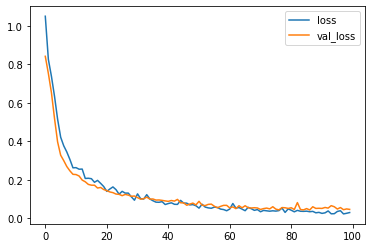

In [14]:
car_evaluation_classifier.plot_loss(model)

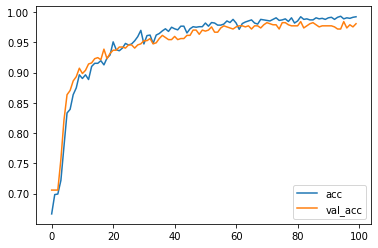

In [15]:
car_evaluation_classifier.plot_accuracy(model)